In [1]:
import pandas as pd
import numpy as np
import us
import seaborn; seaborn.set()
import matplotlib.pyplot  as plt
import seaborn as sns
from matplotlib import pyplot
%matplotlib inline
import plotly as py
import plotly.graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from datetime import datetime
from dateutil.parser import parse

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
pip install us

In [0]:
df = pd.read_csv("coronavirus.csv",parse_dates=['date'])

In [0]:
state_names =[]
df['state_abbrev'] = " "
def get_state_abbrev():
    for row in df.index:
        s = df['state'][row]
        state_abbrev= us.states.lookup(s)
        state_abbrev= state_abbrev.abbr
        state_names.append(state_abbrev)
get_state_abbrev()
df['state_abbrev']=  df.apply(lambda x: state_names)


In [5]:
df

,date,county,state,fips,cases,deaths,state_abbrev
0,2020-01-21,Snohomish,Washington,53061.0,1,0,WA
1,2020-01-22,Snohomish,Washington,53061.0,1,0,WA
2,2020-01-23,Snohomish,Washington,53061.0,1,0,WA
3,2020-01-24,Cook,Illinois,17031.0,1,0,IL
4,2020-01-24,Snohomish,Washington,53061.0,1,0,WA
...,...,...,...,...,...,...,...
98257,2020-04-28,Sublette,Wyoming,56035.0,1,0,WY
98258,2020-04-28,Sweetwater,Wyoming,56037.0,10,0,WY
98259,2020-04-28,Teton,Wyoming,56039.0,65,1,WY
98260,2020-04-28,Uinta,Wyoming,56041.0,6,0,WY


In [0]:
us_data = df.groupby(['state'])['deaths'].sum().reset_index()
us_data.sort_values(["deaths"],
                 ascending=False, inplace=True) 

In [7]:
us_data

,state,deaths
33,New York,300196
31,New Jersey,89938
23,Michigan,53028
22,Massachusetts,36325
19,Louisiana,29884
14,Illinois,28507
4,California,27274
40,Pennsylvania,25893
6,Connecticut,25618
51,Washington,17689


In [0]:
plot_1 = us_data.head(10)

In [9]:
plot_1 


,state,deaths
33,New York,300196
31,New Jersey,89938
23,Michigan,53028
22,Massachusetts,36325
19,Louisiana,29884
14,Illinois,28507
4,California,27274
40,Pennsylvania,25893
6,Connecticut,25618
51,Washington,17689


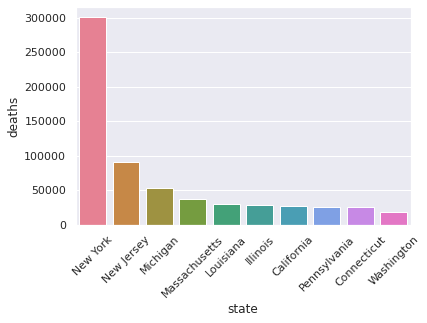

In [10]:
ax = sns.barplot(y= "deaths", x = "state", data = plot_1, palette=("husl"))
sns.set_context("poster")
sns.set(style="darkgrid")
for tick in ax.get_xticklabels():
    tick.set_rotation(45)

In [11]:
import plotly as py
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.offline as pyo

In [12]:
abb = []
for k in us_data['state']:
    state = us.states.lookup(k)
    sta_abb = state.abbr
    abb.append(sta_abb)
us_data["Abbrivation"] = abb

us_data

,state,deaths,Abbrivation
33,New York,300196,NY
31,New Jersey,89938,NJ
23,Michigan,53028,MI
22,Massachusetts,36325,MA
19,Louisiana,29884,LA
14,Illinois,28507,IL
4,California,27274,CA
40,Pennsylvania,25893,PA
6,Connecticut,25618,CT
51,Washington,17689,WA


In [0]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

In [14]:
configure_plotly_browser_state()
fig = go.Figure(data=go.Choropleth(
    locations=us_data["Abbrivation"] , # Spatial coordinates
    z = us_data['deaths'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'magma',
    colorbar_title = "COVID-19 Cases",
))

fig.update_layout(
    title_text = 'COVID-19 Cases in the United States as of April 28, 2020',
    geo_scope='usa', # limite map scope to USA
)



fig.show()

In [15]:
df.query('state == "Florida"', inplace = True)
df['date'] = df['date'].astype('datetime64[ns]')
florida_data = pd.DataFrame(df.groupby(["state"]).resample('D', label='right', closed = 'right', on='date').sum().reset_index().sort_values(by='date'))
florida_data

,state,date,fips,cases,deaths
0,Florida,2020-03-01,24138.0,2,0
1,Florida,2020-03-02,24138.0,2,0
2,Florida,2020-03-03,24138.0,3,0
3,Florida,2020-03-04,24138.0,3,0
4,Florida,2020-03-05,36251.0,4,0
5,Florida,2020-03-06,60333.0,7,2
6,Florida,2020-03-07,96566.0,12,2
7,Florida,2020-03-08,96566.0,13,2
8,Florida,2020-03-09,96566.0,14,2
9,Florida,2020-03-10,156881.0,23,2


In [16]:
florida_cases = florida_data.groupby(['date'])['cases'].sum().reset_index()
florida_deaths = florida_data.groupby(['date'])['deaths'].sum().reset_index()
#weekly_data1.index = pd.to_datetime(weekly_data1.index, unit='s')
florida_cases

,date,cases
0,2020-03-01,2
1,2020-03-02,2
2,2020-03-03,3
3,2020-03-04,3
4,2020-03-05,4
5,2020-03-06,7
6,2020-03-07,12
7,2020-03-08,13
8,2020-03-09,14
9,2020-03-10,23


In [17]:
florida_cases = pd.DataFrame(florida_cases.set_index('date').groupby('date').resample('W')['cases'].bfill())
florida_cases.reset_index(level=0, inplace=True)
florida_cases.rename(columns = {'date':'Week'}, inplace = True) 
florida_cases.reset_index(drop=True, inplace=True)
florida_cases=florida_cases.dropna()
florida_cases

,Week,cases
0,2020-03-01,2.0
7,2020-03-08,13.0
14,2020-03-15,109.0
21,2020-03-22,1000.0
28,2020-03-29,4944.0
35,2020-04-05,12342.0
42,2020-04-12,19855.0
49,2020-04-19,26306.0
56,2020-04-26,31520.0


In [18]:
florida_deaths = pd.DataFrame(florida_deaths.set_index('date').groupby('date').resample('W')['deaths'].bfill())
florida_deaths.reset_index(level=0, inplace=True)
florida_deaths.rename(columns = {'date':'Week'}, inplace = True) 
florida_deaths.reset_index(drop=True, inplace=True)
florida_deaths=florida_deaths.dropna()
florida_deaths

,Week,deaths
0,2020-03-01,0.0
7,2020-03-08,2.0
14,2020-03-15,3.0
21,2020-03-22,13.0
28,2020-03-29,60.0
35,2020-04-05,220.0
42,2020-04-12,460.0
49,2020-04-19,773.0
56,2020-04-26,1073.0


In [19]:
florida=florida_cases.join(florida_deaths.set_index('Week'), on='Week')
florida

,Week,cases,deaths
0,2020-03-01,2.0,0.0
7,2020-03-08,13.0,2.0
14,2020-03-15,109.0,3.0
21,2020-03-22,1000.0,13.0
28,2020-03-29,4944.0,60.0
35,2020-04-05,12342.0,220.0
42,2020-04-12,19855.0,460.0
49,2020-04-19,26306.0,773.0
56,2020-04-26,31520.0,1073.0


In [0]:
X = florida_data['cases'].values
y = florida_data['deaths'].values

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [22]:
regressor = LinearRegression()  
regressor.fit([X_train], [y_train])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
X.reshape(-1,1)

array([[    2],
       [    2],
       [    3],
       [    3],
       [    4],
       [    7],
       [   12],
       [   13],
       [   14],
       [   23],
       [   26],
       [   46],
       [   70],
       [   70],
       [  109],
       [  141],
       [  210],
       [  326],
       [  434],
       [  564],
       [  764],
       [ 1000],
       [ 1222],
       [ 1458],
       [ 1971],
       [ 2479],
       [ 3199],
       [ 4039],
       [ 4944],
       [ 5696],
       [ 6744],
       [ 7772],
       [ 9000],
       [10260],
       [11537],
       [12342],
       [13621],
       [14739],
       [15690],
       [16819],
       [17960],
       [18978],
       [19855],
       [21011],
       [21620],
       [22526],
       [23332],
       [24745],
       [25484],
       [26306],
       [27050],
       [27861],
       [28301],
       [29648],
       [30525],
       [30831],
       [31520],
       [32130],
       [32838]])

In [25]:
regressor.predict(X)

ValueError: ignored